In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import FixedLocator

from timple.timedelta import strftimedelta


import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
from fastf1 import utils

teams = ["Ferrari", "Red Bull Racing", "Mercedes", "McLaren", "RB", "Aston Martin", "Kick Sauber", "Haas F1 Team", "Williams", "Alpine"]

team_colours = {
    "Ferrari": "#DC0000", 
    "Red Bull Racing": "#3671C6",
    "Mercedes": "#27F4D2",
    "McLaren": "#FF8000",
    "RB": "#3671C6",
    "Aston Martin": "#229971", 
    "Kick Sauber": "#52D252",
    "Haas F1 Team": "#B6BABD",
    "Williams": "#64C4FF",
    "Alpine": "#FF87BC"
}

tyre_colours = {
    "soft": "#E30E23",
    "medium": "#F2CA1F",
    "hard": "#E7E5E3",
    "inters": "#07A53C",
    "wets": "#3C65AB"
}

driver_teams = {
    "VER": "Red Bull Racing",
    "PER": "Red Bull Racing",
    "LEC": "Ferrari",
    "SAI": "Ferrari",
    "HAM": "Mercedes",
    "RUS": "Mercedes", 
    "NOR": "McLaren",
    "PIA": "McLaren",
    "RIC": "RB",
    "TSU": "RB",
    "ALO": "Aston Martin",
    "STR": "Aston Martin",
    "BOT": "Kick Sauber",
    "ZHO": "Kick Sauber",
    "MAG": "Haas F1 Team",
    "HUL": "Haas F1 Team", 
    "ALB": "Williams",
    "SAR": "Williams",
    "OCO": "Alpine",
    "GAS": "Alpine"
}

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme="fastf1", misc_mpl_mods=True)

font_files = font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [2]:
data = f1.get_session(year=2024, gp="Bahrain", identifier="Q")
data.load()


req         WARNING 	DEFAULT CACHE ENABLED! (1.08 GB) C:\Users\maxvo\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']


In [3]:
laps = data.laps

In [4]:
q1, q2, q3 = laps.split_qualifying_sessions()

In [5]:
ver_lap = q3.pick_driver("VER").pick_fastest()
lec_lap = q3.pick_driver("LEC").pick_fastest()


ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


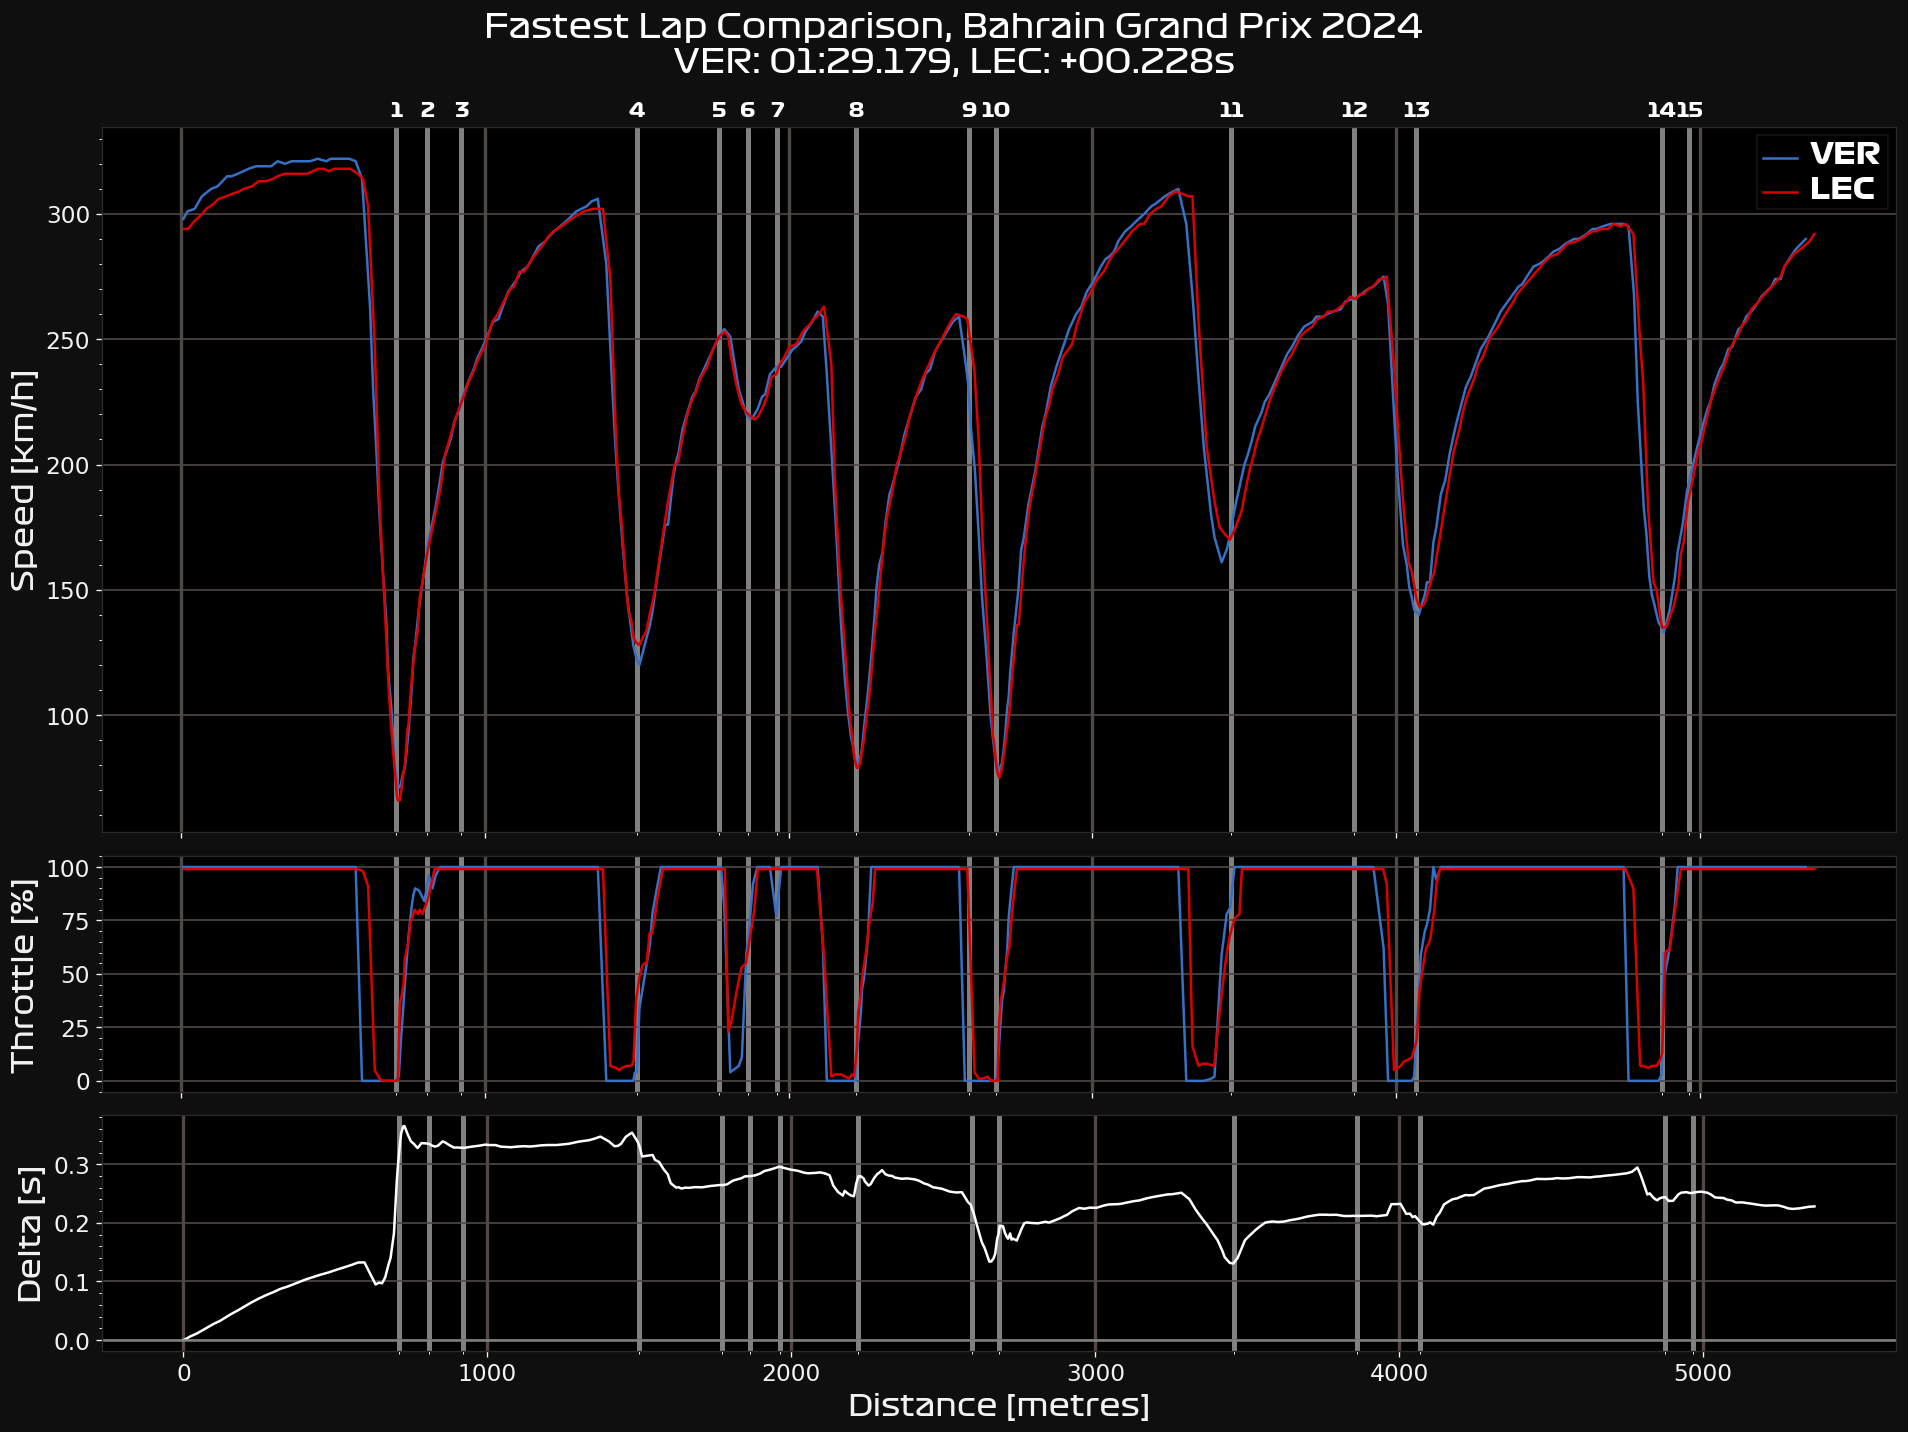

In [12]:
'''TELEMETRY DATA'''

'''SETUP'''
driver1 = "VER"
driver2 = "LEC"

axis_fontsize = 18
tick_fontsize = 14

team1 = driver_teams[driver1]
team2 = driver_teams[driver2]
team1_colour = team_colours[team1]
team2_colour = team_colours[team2]

lap1 = q3.pick_driver(driver1).pick_fastest()
lap2 = q3.pick_driver(driver2).pick_fastest()
lap1_tel = lap1.get_car_data().add_distance()
lap2_tel = lap2.get_car_data().add_distance()

delta_time, ref_tel, compare_tel = utils.delta_time(lap1, lap2)


circuit_info = data.get_circuit_info()
v_min = lap1_tel["Speed"].min()
v_max = lap1_tel["Speed"].max()

'''GRAPH START'''

fig, ax = plt.subplots(nrows=3, height_ratios=[3, 1, 1], figsize=(16,12), dpi=120, facecolor="#0F0F0F")

# CORNER LINES
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner["Number"]}{corner["Letter"]}"
    ax[0].text(corner["Distance"], v_max+20, txt, va="center_baseline", ha="center", size="large", fontname="Formula1", color="white")

# CORNER MINOR AXIS LINE LOCATIONS
corner_location = circuit_info.corners["Distance"]
minor_tick_locations = list()
for corner in corner_location:
    minor_tick_locations.append(corner)


ax[0].plot(lap1_tel["Distance"], lap1_tel["Speed"], color=team1_colour, label=driver1)
ax[0].plot(lap2_tel["Distance"], lap2_tel["Speed"], color=team2_colour, label=driver2)

ax[1].plot(lap1_tel["Distance"], lap1_tel["Throttle"], color=team1_colour, label=driver1)
ax[1].plot(lap2_tel["Distance"], lap2_tel["Throttle"], color=team2_colour, label=driver2)

ax[2].plot(ref_tel["Distance"], delta_time, color="white")
ax[2].axhline(y=0, color="gray")

l = ax[0].legend(facecolor="black", labelcolor="white")
plt.setp(l.texts, family="Formula1", size=axis_fontsize)


ax[0].get_xaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticklabels([])
ax[2].set_xlabel("Distance [metres]", fontname="Formula1", fontsize=axis_fontsize)

y_labels = ["Speed [km/h]", "Throttle [%]", "Delta [s]"]
for n in range(0,3):
    ax[n].tick_params(labelsize=tick_fontsize)
    ax[n].patch.set_facecolor("black")
    ax[n].set_ylabel(y_labels[n], fontname="Formula1", fontsize=axis_fontsize)

    ax[n].xaxis.set_minor_locator(FixedLocator(minor_tick_locations))
    ax[n].grid(which="minor", linestyle="-", linewidth=3, color="gray")
    ax[n].grid(which="minor", axis="y", linewidth=0)
    ax[n].grid(which="major", axis="x", linestyle="-", linewidth=2)




fastest_lap_time = strftimedelta(lap1["LapTime"], "%m:%s.%ms")
diff = strftimedelta(lap2["LapTime"] - lap1["LapTime"], "%s.%ms")
plt.suptitle(f"Fastest Lap Comparison, {data.event["EventName"]} {data.event.year}\n{driver1}: {fastest_lap_time}, {driver2}: +{diff}s",
             fontsize=20, fontname="Formula1", color="white")

fig.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.05)
plt.show()


In [7]:
lap1_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-03-01 16:59:09.889,10674,298,8,100,False,12,car,0 days 00:00:00.091000,0 days 01:12:34.216000,7.532778
1,2024-03-01 16:59:10.049,10757,301,8,100,False,12,car,0 days 00:00:00.251000,0 days 01:12:34.376000,20.910556
2,2024-03-01 16:59:10.330,10858,302,8,100,False,12,car,0 days 00:00:00.532000,0 days 01:12:34.657000,44.483333
3,2024-03-01 16:59:10.610,10987,307,8,100,False,12,car,0 days 00:00:00.812000,0 days 01:12:34.937000,68.361111
4,2024-03-01 16:59:10.970,11049,310,8,100,False,12,car,0 days 00:00:01.172000,0 days 01:12:35.297000,99.361111
...,...,...,...,...,...,...,...,...,...,...,...
340,2024-03-01 17:00:37.730,11095,274,7,100,False,12,car,0 days 00:01:27.932000,0 days 01:14:02.057000,5266.800000
341,2024-03-01 17:00:37.890,11092,279,7,100,False,12,car,0 days 00:01:28.092000,0 days 01:14:02.217000,5279.200000
342,2024-03-01 17:00:38.090,11180,282,7,100,False,12,car,0 days 00:01:28.292000,0 days 01:14:02.417000,5294.866667
343,2024-03-01 17:00:38.370,11293,286,7,100,False,12,car,0 days 00:01:28.572000,0 days 01:14:02.697000,5317.111111


In [8]:
lap2_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-03-01 16:59:24.650,11592,294,7,99,False,12,car,0 days 00:00:00.125000,0 days 01:12:48.977000,10.208333
1,2024-03-01 16:59:24.810,10472,294,8,99,False,12,car,0 days 00:00:00.285000,0 days 01:12:49.137000,23.275000
2,2024-03-01 16:59:25.050,10579,297,8,99,False,12,car,0 days 00:00:00.525000,0 days 01:12:49.377000,43.075000
3,2024-03-01 16:59:25.370,10690,300,8,99,False,12,car,0 days 00:00:00.845000,0 days 01:12:49.697000,69.741667
4,2024-03-01 16:59:25.530,10724,302,8,99,False,12,car,0 days 00:00:01.005000,0 days 01:12:49.857000,83.163889
...,...,...,...,...,...,...,...,...,...,...,...
341,2024-03-01 17:00:52.690,11138,279,7,99,False,14,car,0 days 00:01:28.165000,0 days 01:14:17.017000,5279.039444
342,2024-03-01 17:00:53.090,11423,284,7,99,False,12,car,0 days 00:01:28.565000,0 days 01:14:17.417000,5310.595000
343,2024-03-01 17:00:53.370,11546,286,7,99,False,12,car,0 days 00:01:28.845000,0 days 01:14:17.697000,5332.839444
344,2024-03-01 17:00:53.730,11745,289,7,99,False,12,car,0 days 00:01:29.205000,0 days 01:14:18.057000,5361.739444


In [9]:
for n in range(0,2):
    print(n)

0
1
